In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Univariate Analysis -- 
# Single column
# Numerical column -> histogram
# Categorical vs Numerical(count) column -> bar, pie, area, heatmap, donut...

# Bivariate Analysis -- 
# 2 column
# Numerical vs Numerical column -> scatter, line
# **Categorical vs Numerical column -> bar, pie, area, heatmap, donut...


# Multi-ivariate Analysis -- compare more than 2 columns
# 3 column : represent it as a color
# Numerical vs Numerical (vs Categorical) column -> scatter, line
# **Categorical vs Numerical (vs Categorical) column -> bar, pie, area, heatmap, donut...



hue -> helps to compare 2 columns on the basis of 3rd colum, by giving colors to it

palette -> color plate -> combination of your colors or backend colors

solid colors -> green, blue, red ..........
gradient colors -> distribution of colors over a range



hue + paltte -> provides your distribution of colors to the unique value inside the column

color -> represent single color for the entire chart


https://seaborn.pydata.org/tutorial/color_palettes.html

In [3]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Ticket
0,0,3,male,22.0,1,0,7.2500,Southampton,NaN,"Braund, Mr. Owen Harris",A/5 21171
1,1,1,female,38.0,1,0,71.2833,Cherbourg,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,1,3,female,26.0,0,0,7.9250,Southampton,NaN,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,1,1,female,35.0,1,0,53.1000,Southampton,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,0,3,male,35.0,0,0,8.0500,Southampton,NaN,"Allen, Mr. William Henry",373450


In [4]:
# Univariate Analysis -- 
# Single column
# Numerical column -> histogram

# df.describe()
df['Fare'].describe()



count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

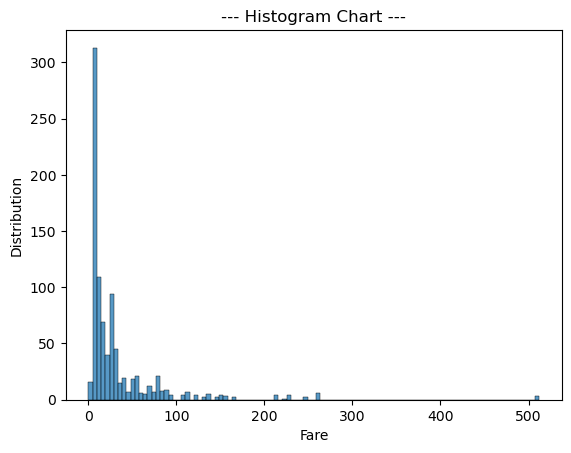

In [9]:
sns.histplot( df['Fare'] )
plt.xlabel("Fare")
plt.ylabel("Distribution")
plt.title("--- Histogram Chart ---")
plt.show()

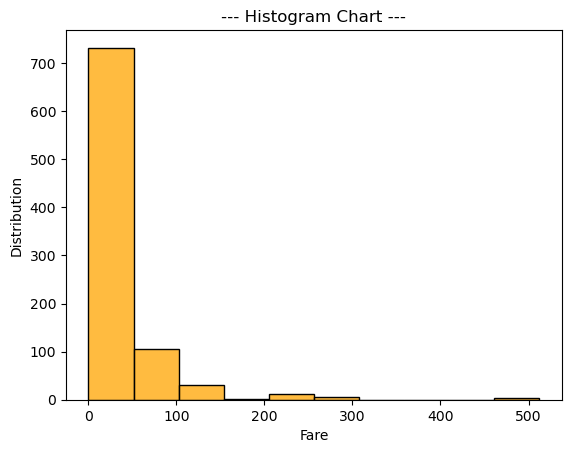

In [14]:
sns.histplot( df['Fare'], bins=10, color = 'orange') # kde -> kernel density estimation
plt.xlabel("Fare")
plt.ylabel("Distribution")
plt.title("--- Histogram Chart ---")
plt.show()

In [ ]:
# Univariate Analysis -- 
# Single column
# Categorical vs Numerical(count) column -> bar, pie, area, heatmap, donut...

In [15]:
gender_group = df.groupby('Sex').aggregate( totalRecords = ("Sex", np.size) )
gender_group

,totalRecords
Sex,
female,314
male,577


In [16]:
x_ = gender_group.index.values
print(x_)

y_ = gender_group['totalRecords'].values
print(y_)


['female' 'male']
[314 577]


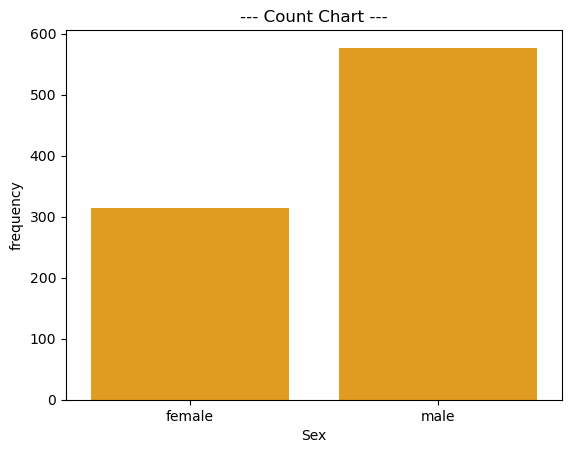

In [21]:
sns.barplot( data = gender_group, x = gender_group.index.values, y = gender_group['totalRecords'].values, 
           color="orange")  

plt.xlabel("Sex")
plt.ylabel("frequency")
plt.title("--- Count Chart ---")
plt.show()

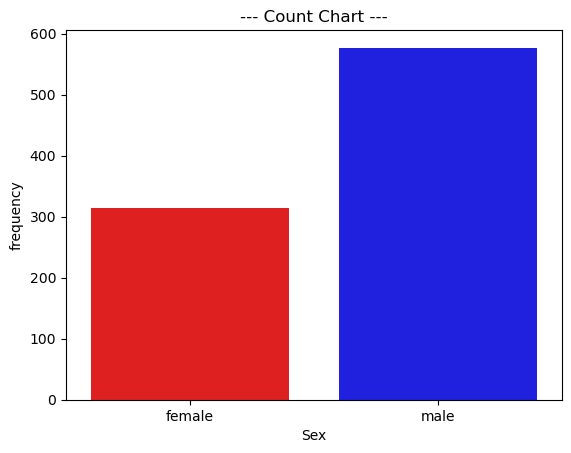

In [24]:
sns.barplot( data = gender_group, x = gender_group.index.values, y = gender_group['totalRecords'].values, 
           palette=["red", "blue"])  

plt.xlabel("Sex")
plt.ylabel("frequency")
plt.title("--- Count Chart ---")
plt.show()

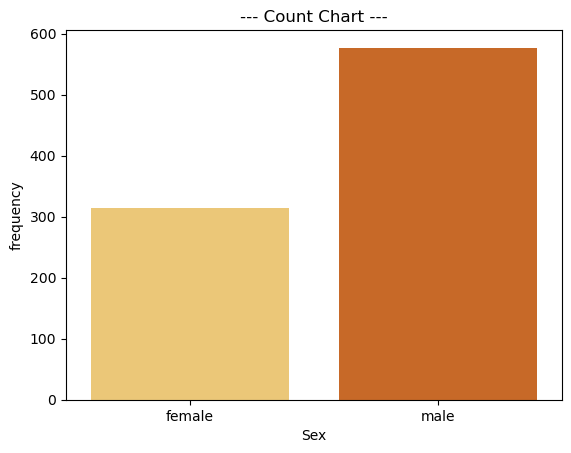

In [25]:
sns.barplot( data = gender_group, x = gender_group.index.values, y = gender_group['totalRecords'].values, 
           palette=  "YlOrBr"  )  

plt.xlabel("Sex")
plt.ylabel("frequency")
plt.title("--- Count Chart ---")
plt.show()

In [26]:
Embarked_group = df.groupby('Embarked').aggregate( totalRecords = ("Embarked", np.size) )
Embarked_group

,totalRecords
Embarked,
Cherbourg,168
Queenstown,77
Southampton,644


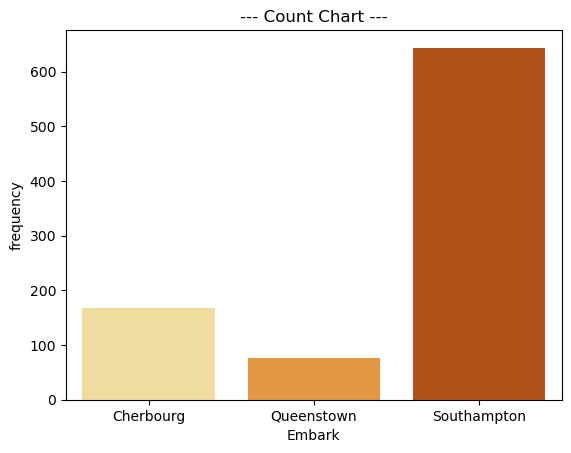

In [27]:
sns.barplot( data = Embarked_group, x = Embarked_group.index.values, 
            y = Embarked_group['totalRecords'].values, 
           palette=  "YlOrBr"  )  

plt.xlabel("Embark")
plt.ylabel("frequency")
plt.title("--- Count Chart ---")
plt.show()

In [30]:
SibSp_group = df.groupby('SibSp').aggregate( totalRecords = ("SibSp", np.size) )
SibSp_group

,totalRecords
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


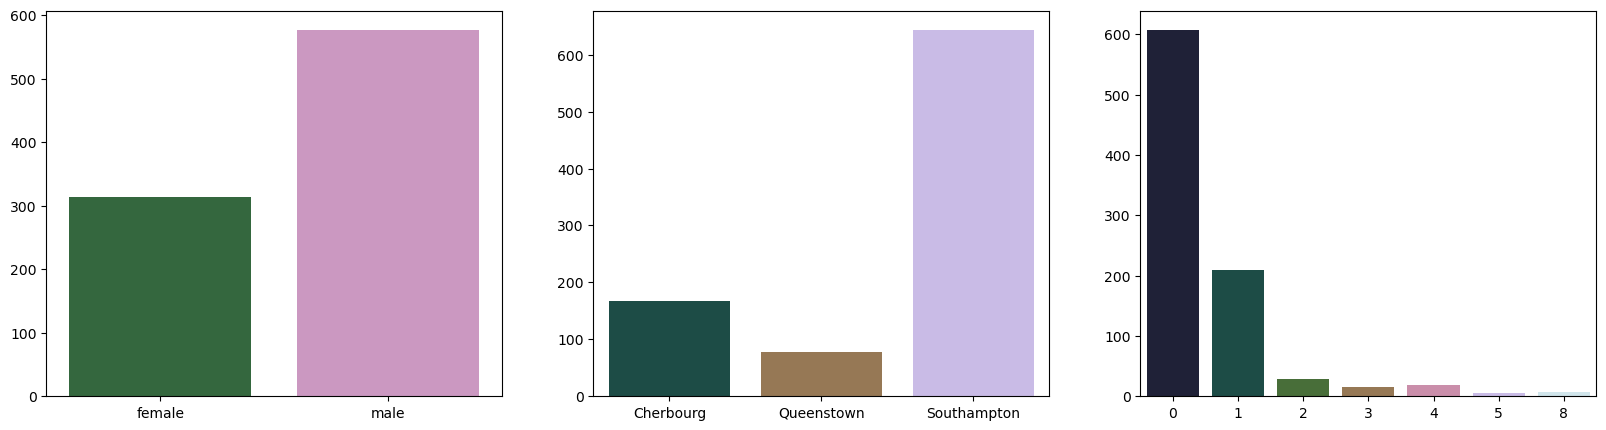

In [33]:
plt.figure( figsize = (20 , 5) )

plt.subplot(1, 3 , 1)
sns.barplot( data = gender_group, x = gender_group.index.values, y = gender_group['totalRecords'].values, 
           palette=  "cubehelix"  )  

plt.subplot(1, 3 , 2)
sns.barplot( data = Embarked_group, x = Embarked_group.index.values, 
            y = Embarked_group['totalRecords'].values, 
           palette=  "cubehelix"  )  

plt.subplot(1, 3 , 3)
sns.barplot( data = SibSp_group, x = SibSp_group.index.values, 
            y = SibSp_group['totalRecords'].values, 
           palette=  "cubehelix"  )  

plt.show()

In [ ]:
# Bivariate Analysis -- 
# 2 column
# Numerical vs Numerical column -> scatter, line




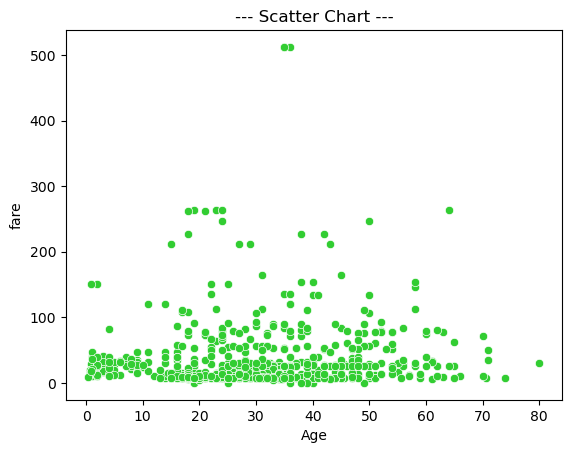

In [37]:
sns.scatterplot(data = df, x = 'Age', y =  'Fare', color = 'limegreen' )

plt.xlabel("Age")
plt.ylabel("fare")
plt.title("--- Scatter Chart ---")
plt.show()

In [ ]:
# Bivariate Analysis -- 
# 2 column
# **Categorical vs Numerical column -> bar, pie, area, heatmap, donut...


In [40]:
Embarked_group = df.groupby('Embarked').aggregate( totalRecords = ("Embarked", np.size), 
                                                 avg_age = ("Age", np.mean), 
                                                 totalFare = ("Fare", np.sum))
Embarked_group

,totalRecords,avg_age,totalFare
Embarked,,,
Cherbourg,168,30.814769,10072.2962
Queenstown,77,28.089286,1022.2543
Southampton,644,29.445397,17439.3988


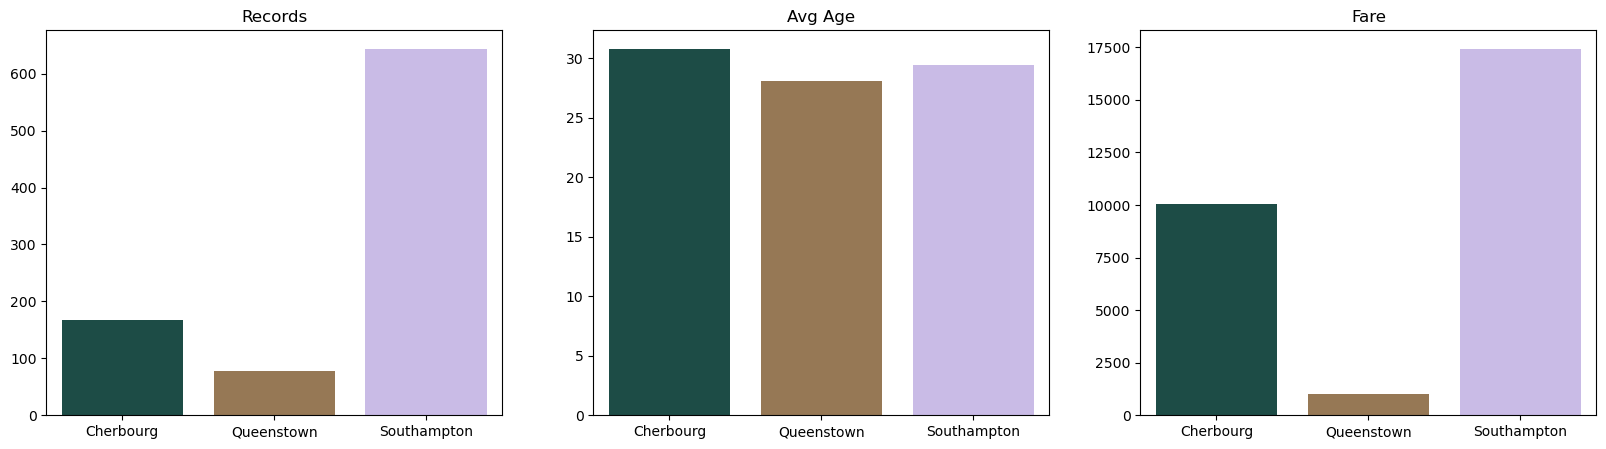

In [44]:
plt.figure( figsize = (20 , 5) )

plt.subplot(1, 3 , 1)
sns.barplot( data = Embarked_group, x = Embarked_group.index.values, 
            y = Embarked_group['totalRecords'].values, 
           palette=  "cubehelix"  )  
plt.title("Records")

plt.subplot(1, 3 , 2)
sns.barplot( data = Embarked_group, x = Embarked_group.index.values, 
            y = Embarked_group['avg_age'].values, 
           palette=  "cubehelix"  )  
plt.title("Avg Age")

plt.subplot(1, 3 , 3)
sns.barplot( data = Embarked_group, x = Embarked_group.index.values, 
            y = Embarked_group['totalFare'].values, 
           palette=  "cubehelix"  )  
plt.title("Fare")

plt.show()

             total_Fare  mean_Fare  min_Fare  max_lFare  median_lFare  \
Embarked                                                                
Cherbourg    10072.2962  59.954144    4.0125   512.3292         29.70   
Queenstown    1022.2543  13.276030    6.7500    90.0000          7.75   
Southampton  17439.3988  27.079812    0.0000   263.0000         13.00   

             std_lFare  
Embarked                
Cherbourg    83.912994  
Queenstown   14.188047  
Southampton  35.887993  


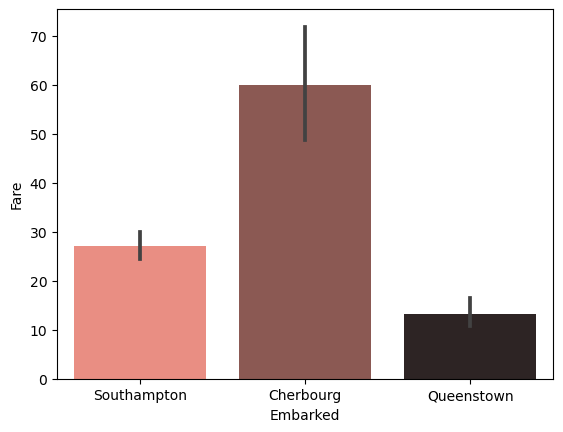

In [49]:
group_emb = df.groupby('Embarked').aggregate( total_Fare = ("Fare", np.sum), 
                                                 mean_Fare = ("Fare", np.mean), 
                                                 min_Fare = ("Fare", np.min), 
                                                 max_lFare = ("Fare", np.max), 
                                                 median_lFare = ("Fare", np.median), 
                                                 std_lFare = ("Fare", np.std))
print( group_emb )

sns.barplot( data = df, x = "Embarked", y = "Fare", palette="dark:salmon_r")  
plt.show()

In [ ]:
# seaborn barplot provides average and standard deviations stats 

In [ ]:
# Multi-ivariate Analysis -- compare more than 2 columns
# 3 column : represent it as a color
# Numerical vs Numerical (vs Categorical) column -> scatter, line

# we add 3rd categorical column as color (hue parameter in seaborn)


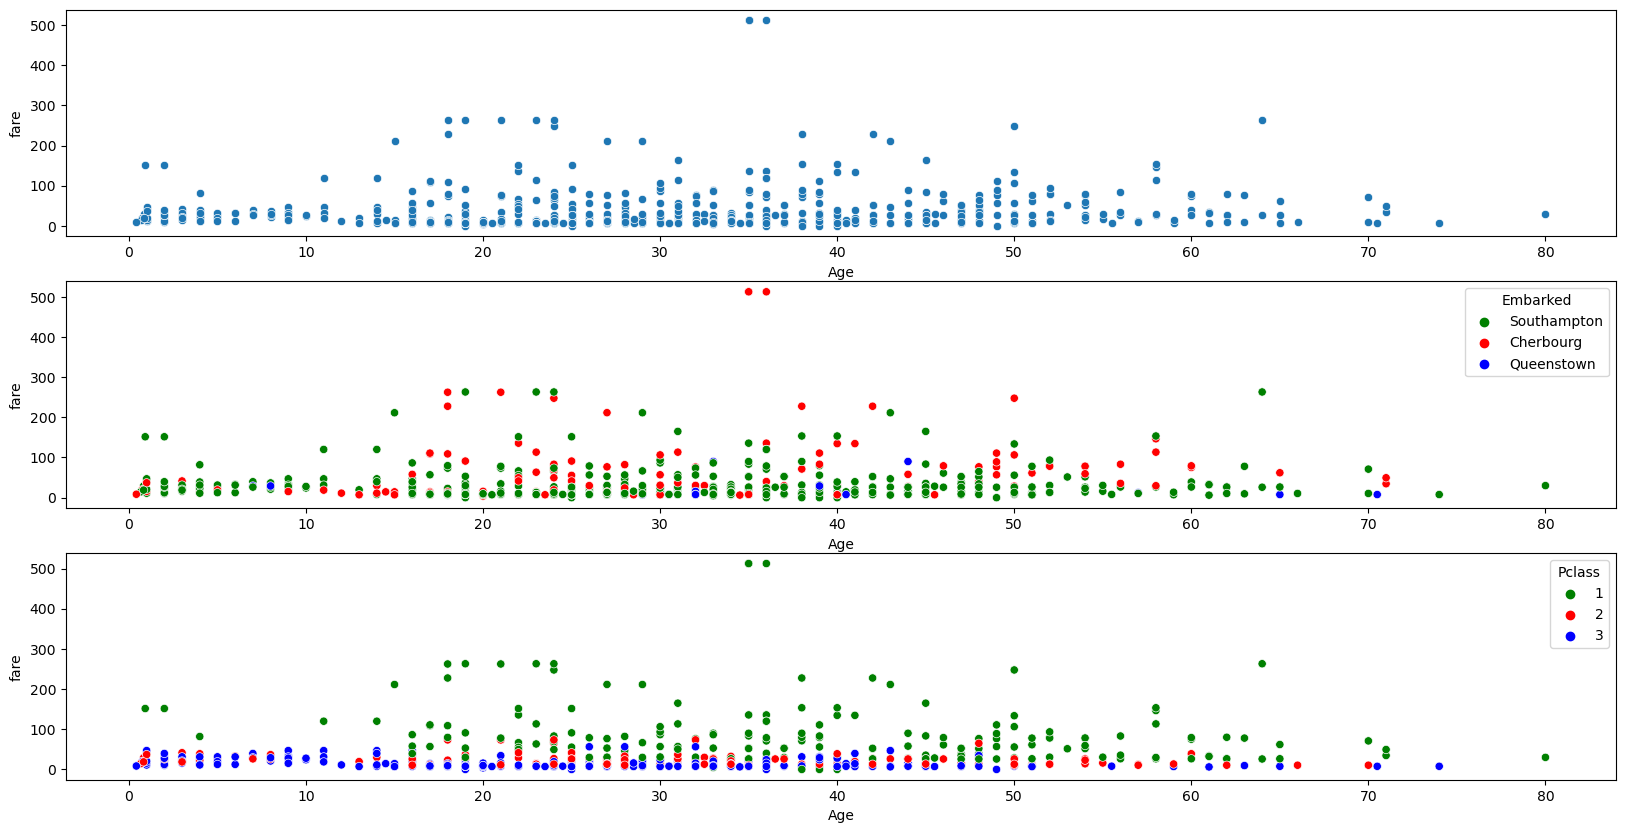

In [63]:
plt.figure( figsize = (20, 10) )

plt.subplot( 3, 1, 1 )
sns.scatterplot(data = df, x = 'Age', y =  'Fare')

plt.xlabel("Age")
plt.ylabel("fare")

plt.subplot( 3, 1, 2 )
sns.scatterplot(data = df, x = 'Age', y =  'Fare', hue ="Embarked", palette=['green', 'red', 'blue'] )

plt.xlabel("Age")
plt.ylabel("fare")

plt.subplot( 3, 1, 3 )
sns.scatterplot(data = df, x = 'Age', y =  'Fare', hue ="Pclass", palette=['green', 'red', 'blue']  )

plt.xlabel("Age")
plt.ylabel("fare")


plt.show()

In [53]:
df[ df['Fare'] > 300 ]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Ticket
258,1,1,female,35.0,0,0,512.3292,Cherbourg,NaN,"Ward, Miss. Anna",PC 17755
679,1,1,male,36.0,0,1,512.3292,Cherbourg,B51 B53 B55,"Cardeza, Mr. Thomas Drake Martinez",PC 17755
737,1,1,male,35.0,0,0,512.3292,Cherbourg,B101,"Lesurer, Mr. Gustave J",PC 17755


In [ ]:
# Multi-ivariate Analysis -- compare more than 2 columns
# 3 column : represent it as a color
# **Categorical vs Numerical (vs Categorical) column -> bar, pie, area, heatmap, donut...


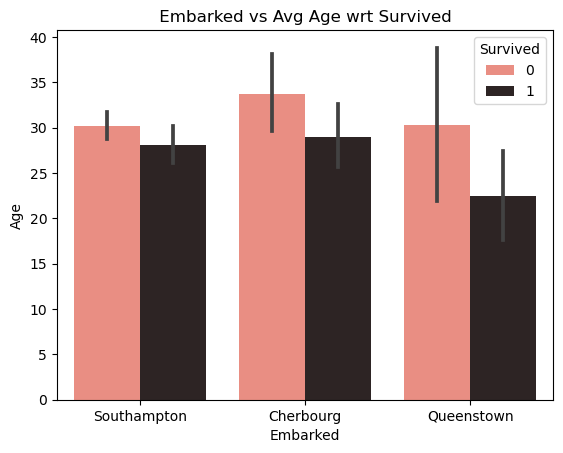

In [67]:
sns.barplot( data = df, x = "Embarked", y = "Age", hue = "Survived",
            palette="dark:salmon_r")  
plt.title(' Embarked vs Avg Age wrt Survived ')
plt.show()

In [68]:
Embarked_group = df.groupby(['Embarked', 'Survived']).aggregate( totalRecords = ("Embarked", np.size), 
                                                 avg_age = ("Age", np.mean), 
                                                 totalFare = ("Fare", np.sum))
Embarked_group

totalRecords    avg_age  totalFare
Embarked    Survived                                    
Cherbourg   0                   75  33.666667  2658.2501
            1                   93  28.973671  7414.0461
Queenstown  0                   47  30.325000   626.7875
            1                   30  22.500000   395.4668
Southampton 0                  427  30.203966  8857.6823
            1                  217  28.113184  8581.7165

In [70]:
emb_ = []
surv_ = []

for ind in Embarked_group.index.values : 
    print(ind)
    emb_.append( ind[0] )
    surv_.append( ind[1] )

print(f"Embarked -> {emb_}")
print(f"Survived -> {surv_}")

('Cherbourg', 0)
('Cherbourg', 1)
('Queenstown', 0)
('Queenstown', 1)
('Southampton', 0)
('Southampton', 1)
Embarked -> ['Cherbourg', 'Cherbourg', 'Queenstown', 'Queenstown', 'Southampton', 'Southampton']
Survived -> [0, 1, 0, 1, 0, 1]


In [72]:
Embarked_group.reset_index(drop = True, inplace=True)
Embarked_group['Embarked'] = emb_
Embarked_group['Survived'] = surv_

Embarked_group

,totalRecords,avg_age,totalFare,Embarked,Survived
0,75,33.666667,2658.2501,Cherbourg,0
1,93,28.973671,7414.0461,Cherbourg,1
2,47,30.325000,626.7875,Queenstown,0
3,30,22.500000,395.4668,Queenstown,1
4,427,30.203966,8857.6823,Southampton,0
5,217,28.113184,8581.7165,Southampton,1


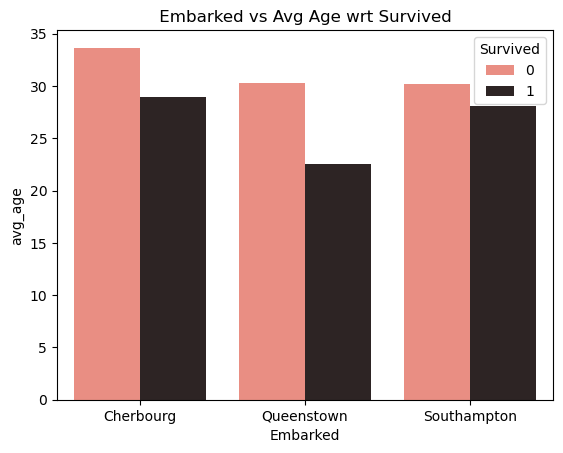

In [74]:
sns.barplot( data = Embarked_group, x = "Embarked", y = "avg_age", hue = "Survived", palette="dark:salmon_r")  
plt.title(' Embarked vs Avg Age wrt Survived ')
plt.show()


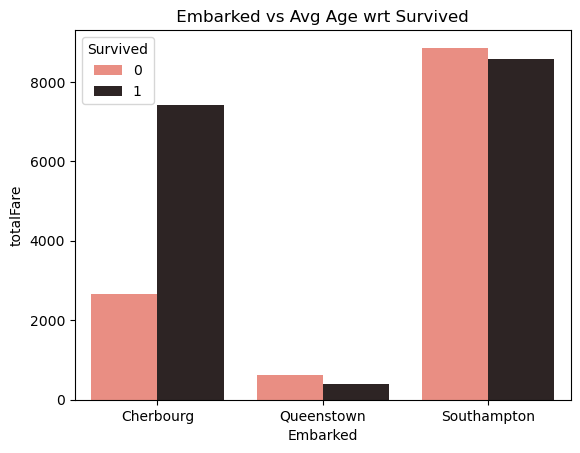

In [75]:
sns.barplot( data = Embarked_group, x = "Embarked", y = "totalFare", hue = "Survived", palette="dark:salmon_r")  
plt.title(' Embarked vs Avg Age wrt Survived ')
plt.show()

In [76]:
## Other Charts ....

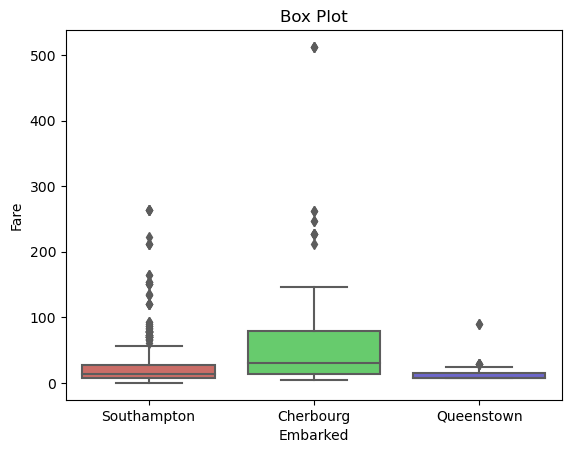

In [79]:
# 1. Boxplot : 

sns.boxplot( data = df, x = "Embarked", y = "Fare", palette="hls")  
plt.xlabel('Embarked')
plt.ylabel("Fare")
plt.title('Box Plot')
plt.show()

# boxplot provides the information about the outliers.
# outliers are the specific records whose behaviour is differernt from the entire population
# 

In [84]:
df[ ['Embarked', "Fare"] ].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [95]:
group_emb = df.groupby('Embarked').aggregate( total_Fare = ("Fare", np.sum), 
                                                 mean_Fare = ("Fare", np.mean), 
                                                 min_Fare = ("Fare", np.min), 
                                                 max_Fare = ("Fare", np.max), 
                                                 median_Fare = ("Fare", np.median), 
                                                 std_Fare = ("Fare", np.std))
print( group_emb )

             total_Fare  mean_Fare  min_Fare  max_Fare  median_Fare   std_Fare
Embarked                                                                      
Cherbourg    10072.2962  59.954144    4.0125  512.3292        29.70  83.912994
Queenstown    1022.2543  13.276030    6.7500   90.0000         7.75  14.188047
Southampton  17439.3988  27.079812    0.0000  263.0000        13.00  35.887993


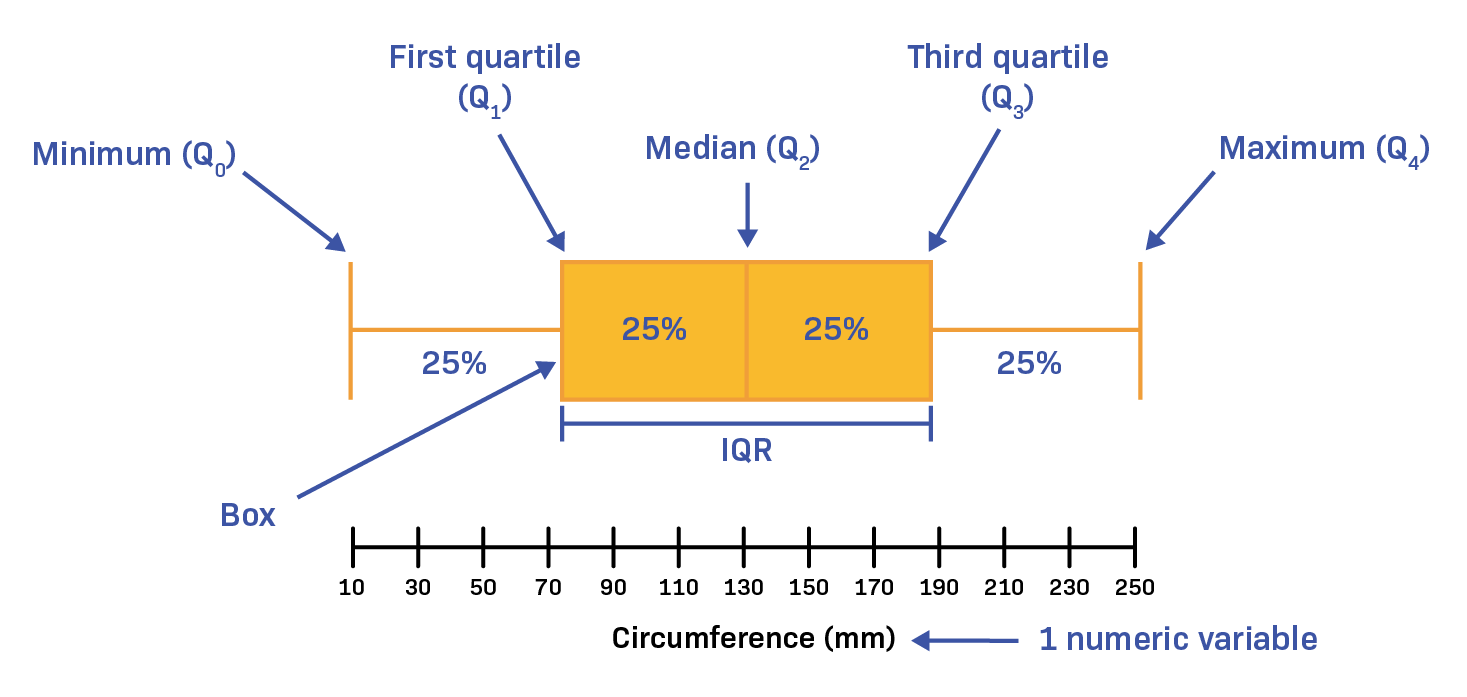

q1 - > 25 percentile
q2 - > 50 percentile (Median)
q3 - > 75 percentile

IQR -> Inter Quartile Region -> q3 - q1

minimum -> lower whisker -> q1 - iqr
maximum -> upper whisker -> q3 + iqr


outliers are the values that are below lower whisker or above upper whisker

In [92]:
newData = df[ ['Embarked', "Fare"] ]

np.percentile( a = newData['Fare'], q = 25 )

7.9104

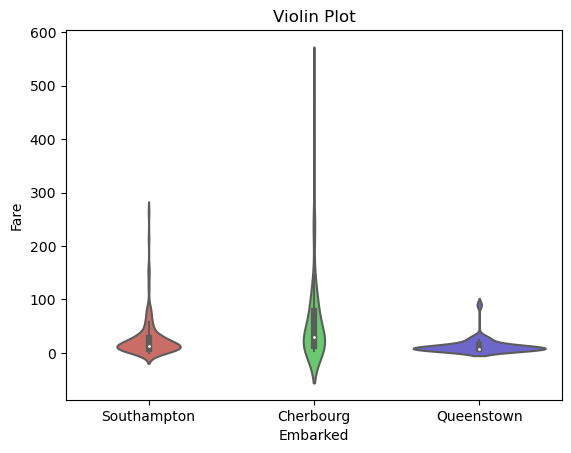

In [81]:
sns.violinplot( data = df, x = "Embarked", y = "Fare", palette="hls")  
plt.xlabel('Embarked')
plt.ylabel("Fare")
plt.title('Violin Plot')
plt.show()

# white dot -> median
# same like boxplot


C:\Users\Nitish\AppData\Local\Temp\ipykernel_20968\2867521848.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot( data = df, x = "Embarked", y = "Fare", palette="hls")


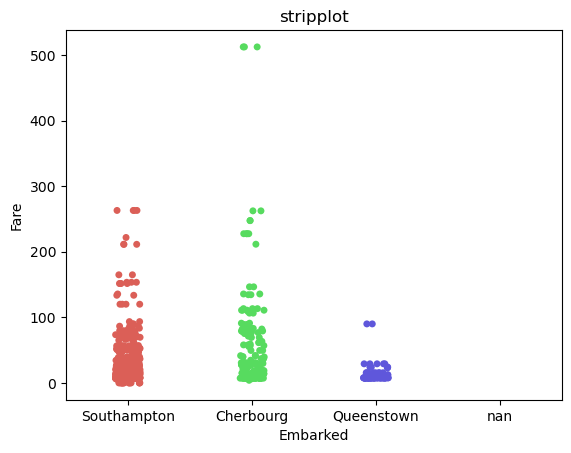

In [82]:
sns.stripplot( data = df, x = "Embarked", y = "Fare", palette="hls")  
plt.xlabel('Embarked')
plt.ylabel("Fare")
plt.title('stripplot')
plt.show()

# range of values 
# density of dots helps with total records that fall under it

C:\Users\Nitish\AppData\Local\Temp\ipykernel_20968\3992140399.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot( data = df, x = "Embarked", y = "Fare", palette="hls")
D:\Programs\Python\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Programs\Python\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Programs\Python\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Programs\Python\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.6% of the points 

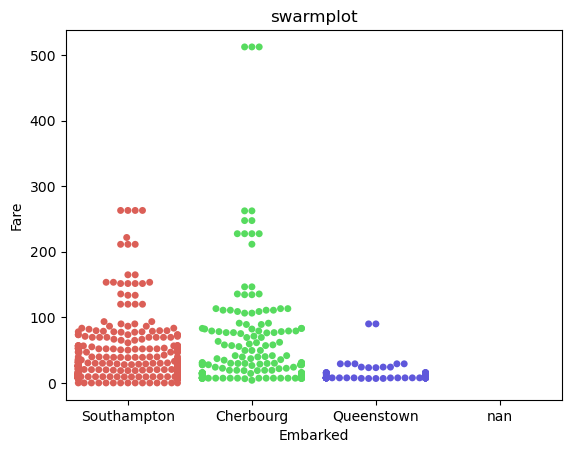

In [83]:
sns.swarmplot( data = df, x = "Embarked", y = "Fare", palette="hls")  
plt.xlabel('Embarked')
plt.ylabel("Fare")
plt.title('swarmplot')
plt.show()

# range of values 
# thickness helps with total records that fall under it